# **Exploratory Data Analysis on FMCG Sales Dataset**

### **FMCG Dataset - Overview**

This dataset simulates daily-level transactional data for products sold in the Fast-Moving Consumer Goods (FMCG) sector between 2022 and 2024.

This is designed to support analysis of:

- Seasonality and product lifecycle
- Promotion and holiday effects
- Stockouts and inventory dynamics
- Demand forecasting and feature engineering

Each row represents one SKU on a specific day, across different sales channels and regions.
It is intended for educational and portfolio-building purposes.

- Link to the dataset I am using for the practice

(https://www.kaggle.com/datasets/beatafaron/fmcg-daily-sales-data-to-2022-2024?select=FMCG_2022_2024.csv)

- The data has been manipulated after it was downloaded from Kaggle. This is because the data didn't have enough information to support our analysis. In order to be able to have a clean and consistent analysis, we added some few informations to the dataset. This eventually will make our analysis an hypothetical analysis.


For our columns, each record includes;

- date: Date of the sales record
- sku: Stock Keeping Unit (unique product ID)
- brand: Brand name of the product
- segment: Product segment (e.g., premium, standard, economy)
- category: Product category (e.g., Beverages, Snacks)
- channel: Sales channel (e.g., Retail, E-commerce)
- region: Region where the sale occurred
- pack_type: Packaging type
- price_unit: Price per single unit
- promotion_flag: Whether the sale occurred under promotion (1 = Yes, 0 = No)
- delivery_days: Number of days taken to deliver
- stock_available: Units available in stock
- delivered_qty: Number of units delivered
- units_sold: Total units actually sold

The goal is to understand the comapny's performance and uncover insights that can help improve sales strategies and stock management.

Tutor: Mr Richie

#### **Business Questions to Solve**

We'll answer the following questions during the analysis

1. Which region generates the highest total sales volume?
2. Which product categories sell the most units in terms of their total sales?
3. Which brands perform best across all sales?
4. What is the relationship between price and quantity sold?
5. What are the yearly sales trends?
6. Which region recorded the highest sales after promotion?
7. Which region has the most stock available (on ground)?
8. Which sales channel generated the highest total revenue?


#### **Importing Libraries and Loading the Dataset**

In this section I will be importing the necessary libraries that will be needed for my data analysis and manipulation. Also I will be loading my dataset for the analysis.

In [9]:
# importing the necessary libraries

import pandas as pd
import numpy as np

# Load Dataset

df = pd.read_csv("FMCG_2022_2024.csv")
df.head()                               

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,units_sold
0,1/21/2022,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,1,141.0,9
1,1/21/2022,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,1,3,0.0,0
2,1/21/2022,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,5,118.0,8
3,1/21/2022,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,2,81.0,7
4,1/21/2022,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,4,NaN,12


In [10]:
#  Preview the last 5 rows of the dataset

df.tail()

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,units_sold
190752,12/31/2024,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-North,Single,2.55,0,2,190.0,25
190753,12/31/2024,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-South,Single,6.01,0,5,141.0,19
190754,12/31/2024,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-Central,Single,3.45,0,5,0.0,0
190755,12/22/2024,MI-022,MiBrand3,Milk-Seg2,Milk,Retail,PL-North,Carton,8.45,0,3,166.0,10
190756,12/31/2024,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-South,Single,1.91,0,5,82.0,8


#### **Data Cleaning**

Before analysis, I need to ensure that the data is properly cleaned and reliable for my analysis.

In [11]:
# Preview data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190757 entries, 0 to 190756
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             190757 non-null  object 
 1   sku              190757 non-null  object 
 2   brand            190757 non-null  object 
 3   segment          190757 non-null  object 
 4   category         190757 non-null  object 
 5   channel          190757 non-null  object 
 6   region           190757 non-null  object 
 7   pack_type        190757 non-null  object 
 8   price_unit       190757 non-null  float64
 9   promotion_flag   190757 non-null  int64  
 10  delivery_days    190757 non-null  int64  
 11  stock_available  190752 non-null  float64
 12  units_sold       190757 non-null  int64  
dtypes: float64(2), int64(3), object(8)
memory usage: 18.9+ MB


In [12]:
# Converting multiple columns to their proper datatypes

df["date"] = df["date"].astype("datetime64[ns]")
df["sku"] = df["sku"].astype("string")
df["brand"] = df["brand"].astype("string")
df["segment"] = df["segment"].astype("string")
df["category"] = df["category"].astype("string")
df["channel"] = df["channel"].astype("string")
df["region"] = df["region"].astype("string")
df["pack_type"] = df["pack_type"].astype("string")

# Rechecking to see if my datatype has been properly converted

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190757 entries, 0 to 190756
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date             190757 non-null  datetime64[ns]
 1   sku              190757 non-null  string        
 2   brand            190757 non-null  string        
 3   segment          190757 non-null  string        
 4   category         190757 non-null  string        
 5   channel          190757 non-null  string        
 6   region           190757 non-null  string        
 7   pack_type        190757 non-null  string        
 8   price_unit       190757 non-null  float64       
 9   promotion_flag   190757 non-null  int64         
 10  delivery_days    190757 non-null  int64         
 11  stock_available  190752 non-null  float64       
 12  units_sold       190757 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), string(7)
memory usage: 18.9 M

In [13]:
# Checking for missing values

df.isnull().sum()

date               0
sku                0
brand              0
segment            0
category           0
channel            0
region             0
pack_type          0
price_unit         0
promotion_flag     0
delivery_days      0
stock_available    5
units_sold         0
dtype: int64

In [14]:
# Fill missing values with 0

numerical_cols = df.select_dtypes(include=["float"]).columns
df[numerical_cols] = df[numerical_cols].fillna(0)

# Rechecking to see if the dataset with Null has been updated

df.isnull().sum()

date               0
sku                0
brand              0
segment            0
category           0
channel            0
region             0
pack_type          0
price_unit         0
promotion_flag     0
delivery_days      0
stock_available    0
units_sold         0
dtype: int64

In [15]:
# Converting stock_available from float to integer

df["stock_available"] = df["stock_available"].astype("int64")

# Rechecking to see if my data has been properly converted to the correct datatype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190757 entries, 0 to 190756
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date             190757 non-null  datetime64[ns]
 1   sku              190757 non-null  string        
 2   brand            190757 non-null  string        
 3   segment          190757 non-null  string        
 4   category         190757 non-null  string        
 5   channel          190757 non-null  string        
 6   region           190757 non-null  string        
 7   pack_type        190757 non-null  string        
 8   price_unit       190757 non-null  float64       
 9   promotion_flag   190757 non-null  int64         
 10  delivery_days    190757 non-null  int64         
 11  stock_available  190757 non-null  int64         
 12  units_sold       190757 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), string(7)
memory usage: 18.9 M

In [16]:
# Checking for duplicates

df.duplicated().sum()

np.int64(7)

In [17]:
# Drop duplicates      

df.drop_duplicates(inplace=True)

# preview the data

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190750 entries, 0 to 190756
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date             190750 non-null  datetime64[ns]
 1   sku              190750 non-null  string        
 2   brand            190750 non-null  string        
 3   segment          190750 non-null  string        
 4   category         190750 non-null  string        
 5   channel          190750 non-null  string        
 6   region           190750 non-null  string        
 7   pack_type        190750 non-null  string        
 8   price_unit       190750 non-null  float64       
 9   promotion_flag   190750 non-null  int64         
 10  delivery_days    190750 non-null  int64         
 11  stock_available  190750 non-null  int64         
 12  units_sold       190750 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), string(7)
memory usage: 20.4 MB


In [18]:
# Renaming the segment, category, channel and the pack_type columns

df.rename(columns={
    "segment": "product_segment",
    "category": "product_category",
    "channel": "sales_channel",
    "pack_type": "packaging_type"
    }, inplace=True)

# Preview if the columns have been properly renamed

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190750 entries, 0 to 190756
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              190750 non-null  datetime64[ns]
 1   sku               190750 non-null  string        
 2   brand             190750 non-null  string        
 3   product_segment   190750 non-null  string        
 4   product_category  190750 non-null  string        
 5   sales_channel     190750 non-null  string        
 6   region            190750 non-null  string        
 7   packaging_type    190750 non-null  string        
 8   price_unit        190750 non-null  float64       
 9   promotion_flag    190750 non-null  int64         
 10  delivery_days     190750 non-null  int64         
 11  stock_available   190750 non-null  int64         
 12  units_sold        190750 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), string(7)
memory usa

#### **Data Analysis and Visualization**

#### **Data Analysis**

This is the process where we inspect, transform and model the data to discover useful information, derive conclusion, and support decision making. This stage is when we turn our cleaned data into actionable insights.

#### **Data Visualization**

This is where we perform graphical representation of our data. It is a key step in data analysis that uses visual elements like charts, graphs and maps in order to see and understand trends, outliers and patterns in our datsets.

In [19]:
# importing libraries for our visualizations

import matplotlib.pyplot as plt
import seaborn as sns

# Viewing my datatset summary statistics

df.describe()

,date,price_unit,promotion_flag,delivery_days,stock_available,units_sold
count,190750,190750.000000,190750.000000,190750.000000,190750.000000,190750.000000
mean,2023-10-28 04:17:46.392660736,5.252024,0.149195,3.004865,157.693693,19.919596
min,2022-01-21 00:00:00,1.500000,0.000000,1.000000,-12.000000,-25.000000
25%,2023-04-16 00:00:00,3.380000,0.000000,2.000000,124.000000,12.000000
50%,2023-11-12 00:00:00,5.250000,0.000000,3.000000,155.000000,18.000000
75%,2024-06-07 00:00:00,7.130000,0.000000,4.000000,192.000000,25.000000
max,2024-12-31 00:00:00,9.000000,1.000000,5.000000,405.000000,139.000000
std,NaN,2.166711,0.356282,1.414624,52.741206,11.769580


In [20]:
# Calculating the total sales for each records

df["total_sales"] = df["units_sold"] * df["price_unit"]

df.head()

,date,sku,brand,product_segment,product_category,sales_channel,region,packaging_type,price_unit,promotion_flag,delivery_days,stock_available,units_sold,total_sales
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,1,141,9,21.42
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,1,3,0,0,0.00
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,5,118,8,32.00
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,2,81,7,36.12
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,4,0,12,91.92


In [21]:
# 1. Checking the region with the highest sales

region_sales = df.groupby("region")["total_sales"].sum().sort_values(ascending=False)
print(region_sales)

region
PL-South      6665872.15
PL-North      6664049.12
PL-Central    6620681.53
Name: total_sales, dtype: float64


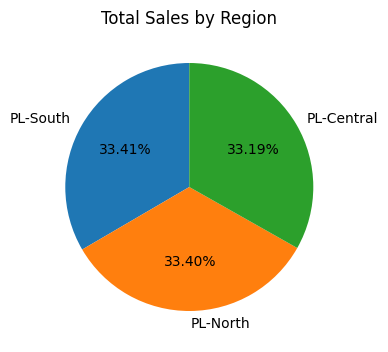

In [22]:
# Matplotlib Visuals: Showing the region with highest sales

plt.figure(figsize=(4,6))  #plot size
plt.pie(region_sales, labels=region_sales.index, autopct='%1.2f%%', startangle=90)
plt.title("Total Sales by Region")
plt.show()

In [23]:
# 2. check the top products categories by total sales

top_cat = df.groupby("product_category")["total_sales"].sum().sort_values(ascending=False)
print(top_cat)

product_category
Yogurt       8225631.47
Milk         4095316.68
ReadyMeal    3576329.02
SnackBar     3401048.36
Juice         652277.27
Name: total_sales, dtype: float64


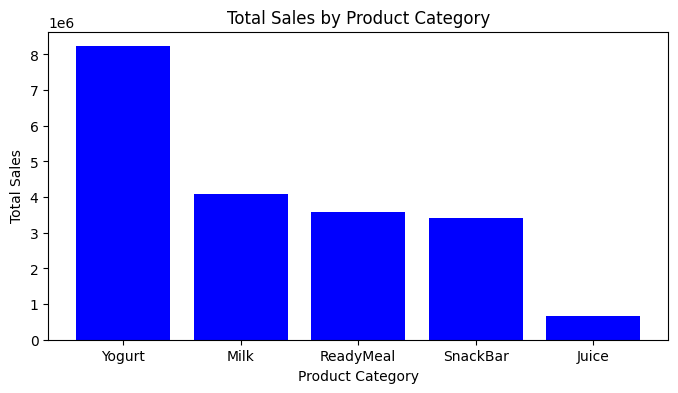

In [24]:
# Matplotlib Visuals: Total Sales by Product  Categories

plt.figure(figsize=(8,4))
plt.bar(top_cat.index, top_cat.values, color = "blue")
plt.title("Total Sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.show()

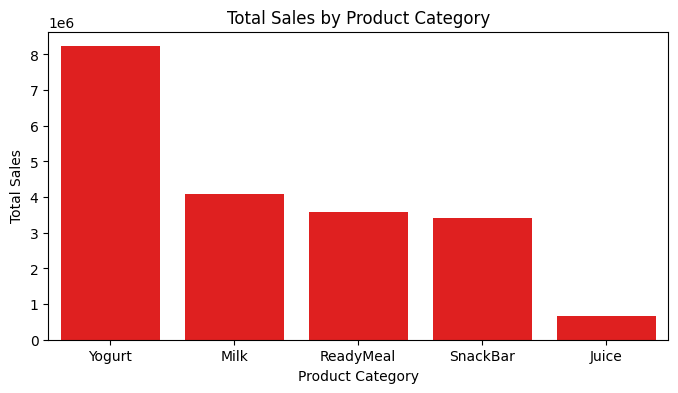

In [25]:
# Using Seaborn Visuals with the same analysis: Total Sales by Product Category 

plt.figure(figsize=(8,4))
sns.barplot(x=top_cat.index, y=top_cat.values, color = "red")
plt.title("Total Sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.show()

In [26]:
# 3. Best Brands across all sales

brands_sales = df.groupby("brand")["total_sales"].sum().sort_values(ascending=False)
print(brands_sales)

brand
SnBrand2    2860353.64
YoBrand4    2473502.54
YoBrand3    2116839.66
YoBrand2    2015514.93
MiBrand3    1664244.74
YoBrand1    1619774.34
ReBrand4    1530909.02
ReBrand2    1253133.67
MiBrand1    1134850.01
MiBrand4     796853.75
ReBrand1     792286.33
JuBrand3     652277.27
SnBrand3     540694.72
MiBrand2     499368.18
Name: total_sales, dtype: float64


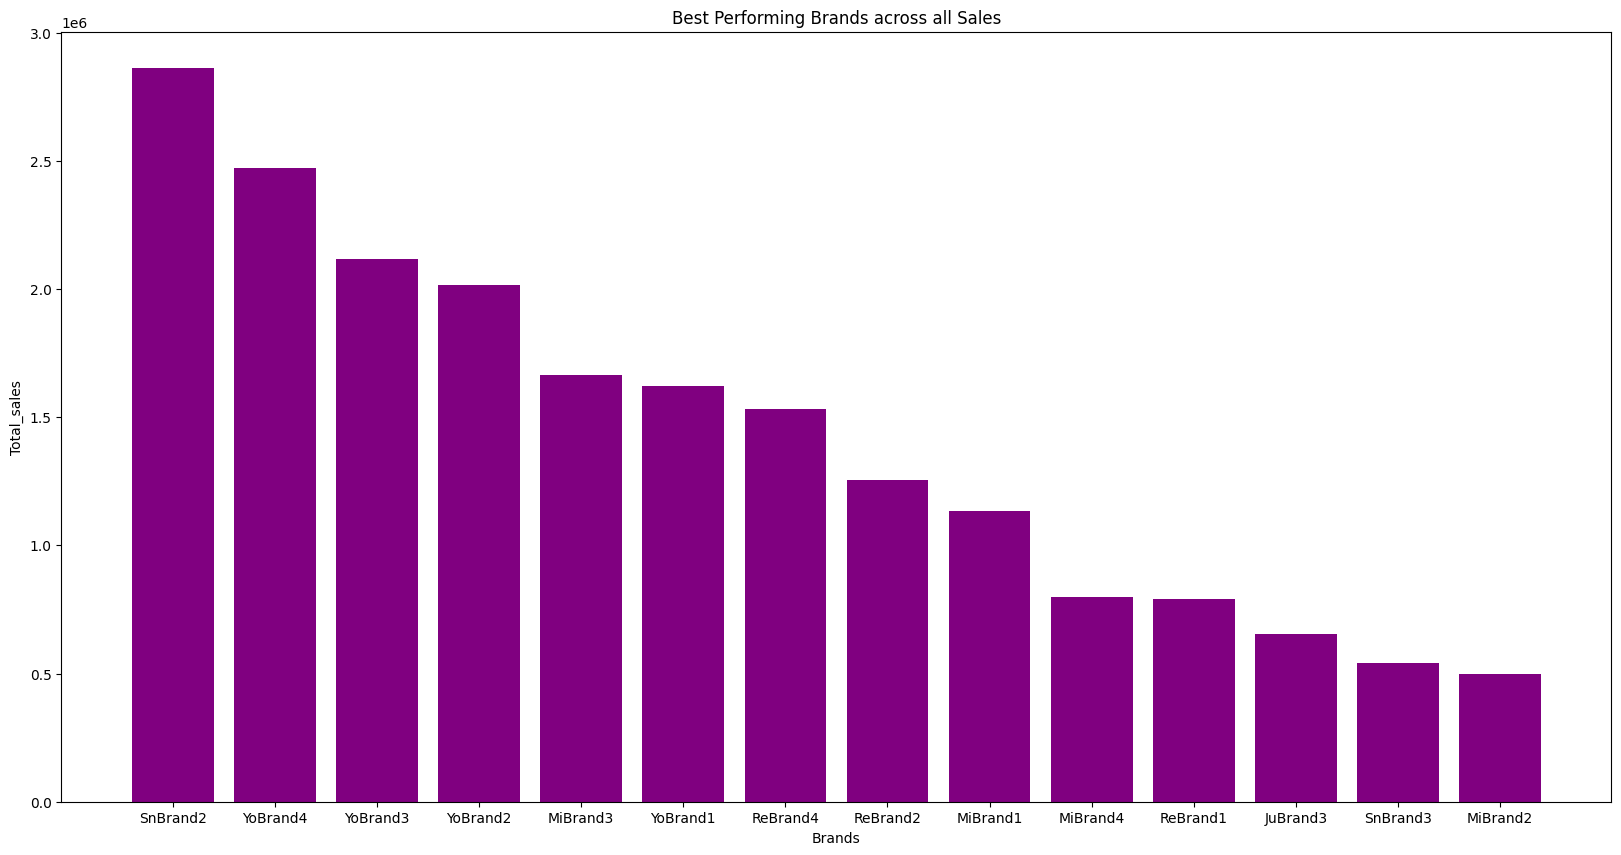

In [27]:
# Matplotlib Visuals: best brands across all sales

plt.figure(figsize=(20,10))
plt.bar(brands_sales.index, brands_sales.values, color = "purple")
plt.title("Best Performing Brands across all Sales")
plt.xlabel("Brands")
plt.ylabel("Total_sales")
plt.show()

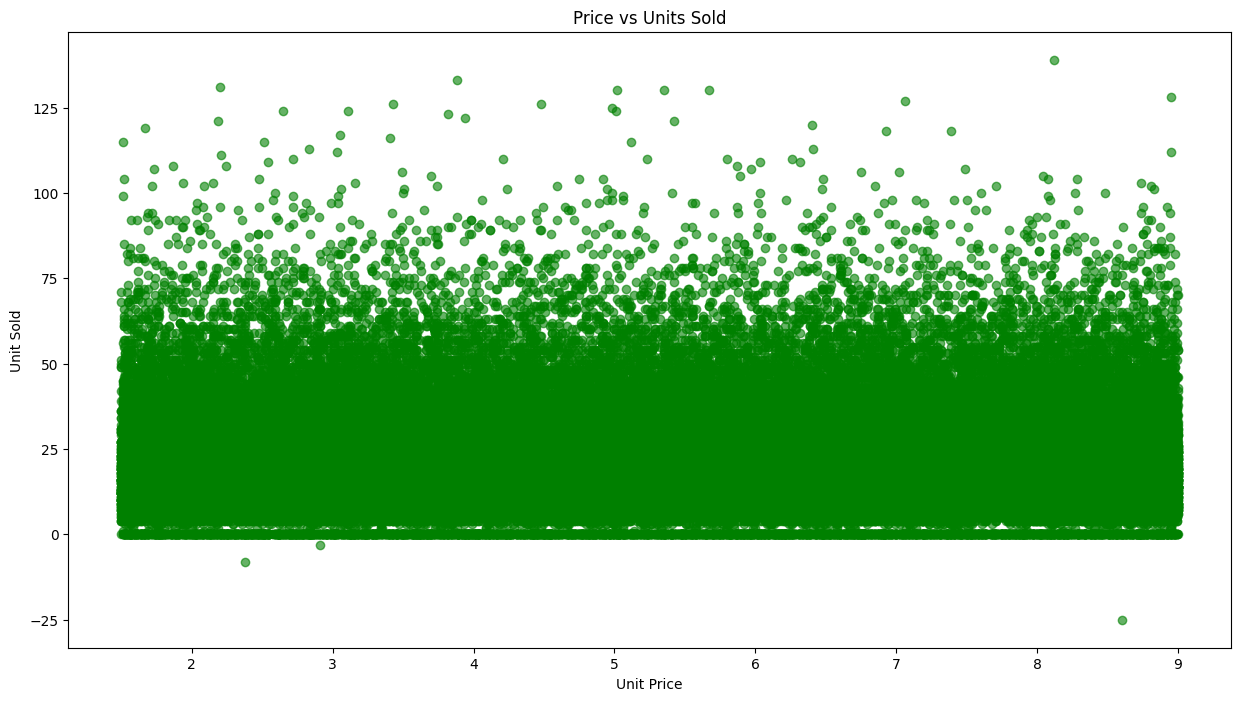

In [28]:
# 4. Matplotlib Visuals: Relatioship between Unit Price and Units Sold

plt.figure(figsize=(15,8))
plt.scatter(df["price_unit"], df["units_sold"], color = "green", alpha=0.6)
plt.title("Price vs Units Sold")
plt.xlabel("Unit Price")
plt.ylabel("Unit Sold")
plt.show()

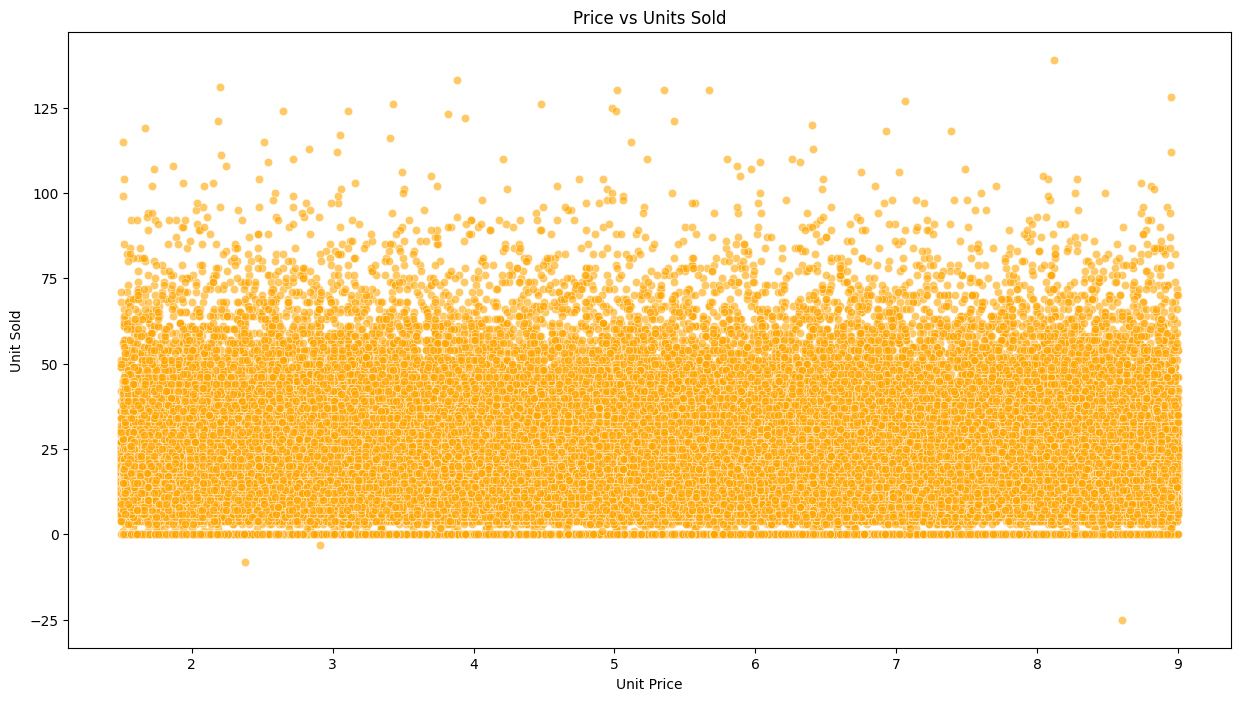

In [29]:
# Using Seaborn Visuals with the same analysis: Relationship between Unit price and Units Sold

plt.figure(figsize=(15,8))
sns.scatterplot(x="price_unit", y="units_sold", data=df, color="orange", alpha=0.6)
plt.title("Price vs Units Sold")
plt.xlabel("Unit Price")
plt.ylabel("Unit Sold")
plt.show()

In [30]:
# 5. Yearly Sales Trend

yearly_sales = df.groupby(df["date"].dt.to_period("Y"))["total_sales"].sum().sort_index()
print(yearly_sales)

date
2022    3166902.77
2023    8435708.16
2024    8347991.87
Freq: Y-DEC, Name: total_sales, dtype: float64


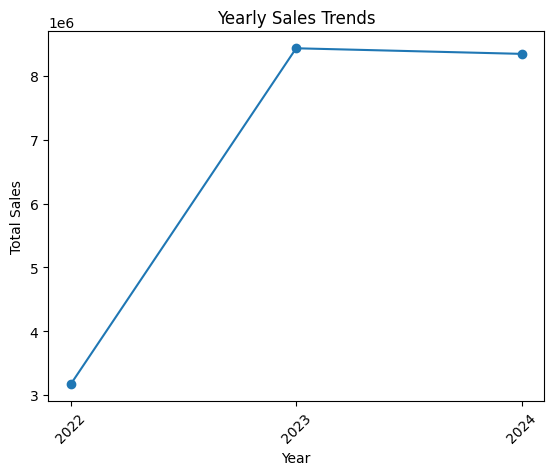

In [31]:
# Matplotlib Visuals: Yearly Sales Trends

plt.Figure(figsize=(8,4))
plt.plot(yearly_sales.index.astype(str), yearly_sales.values, marker="o")
plt.title("Yearly Sales Trends")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

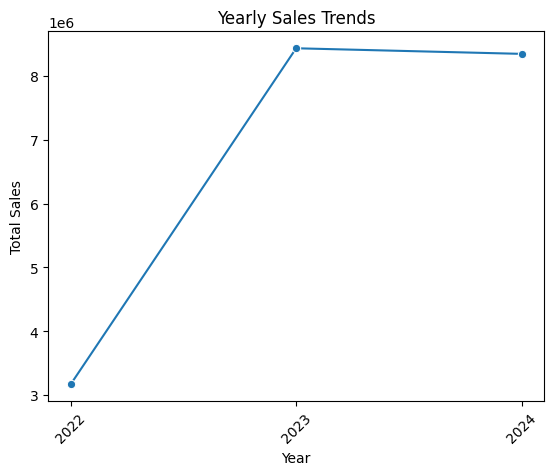

In [33]:
# Using Seaborn Visuals with the same analysis: Yearly Sales Trends

plt.Figure(figsize=(8,4))
sns.lineplot(x=yearly_sales.index.astype(str), y=yearly_sales.values, marker="o") 
plt.title("Yearly Sales Trends")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

In [38]:
# 6. Region with the highest sales after promotion

# filter only  promotional sales

promo_sales = df[df["promotion_flag"] == 1]

# Group by region and sum revenue
region_sales = promo_sales.groupby("region")["total_sales"].sum().sort_values(ascending=False)
print(region_sales)

region
PL-North      1708727.25
PL-South      1707904.34
PL-Central    1684420.29
Name: total_sales, dtype: float64


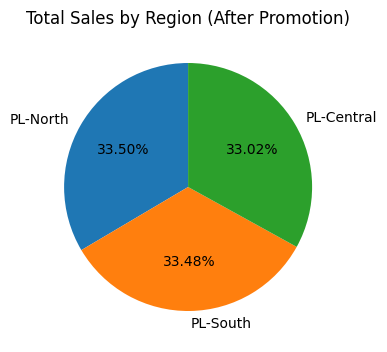

In [39]:
# Matplotlib Visuals: region with the highest sales after promotion

plt.figure(figsize=(4,6))  #plot size
plt.pie(region_sales, labels=region_sales.index, autopct='%1.2f%%', startangle=90)
plt.title("Total Sales by Region (After Promotion)")
plt.show()

In [40]:
# 7. Region with the most stocks on ground

region_stock = df.groupby("region")["stock_available"].sum().sort_values(ascending=False)
print(region_stock)


region
PL-North      10055603
PL-South      10023842
PL-Central    10000627
Name: stock_available, dtype: int64


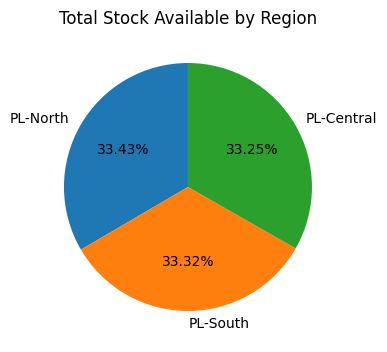

In [41]:
# Matplotlib Visuals: Total Stock available by region

plt.figure(figsize=(4,6))  #plot size
plt.pie(region_stock, labels=region_stock.index, autopct='%1.2f%%', startangle=90)
plt.title("Total Stock Available by Region")
plt.show()

In [42]:
# 8. Sales Channel with the highest revenue

channel_revenue = df.groupby("sales_channel")["total_sales"].sum().sort_values(ascending=False)
print(channel_revenue)

sales_channel
Retail        6655140.86
E-commerce    6653188.83
Discount      6642273.11
Name: total_sales, dtype: float64


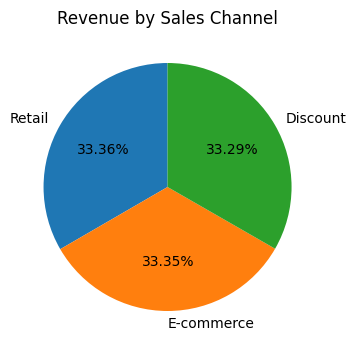

In [43]:
# Matplotlib Visuals: Sales Channel with the highest revenue

plt.figure(figsize=(4,6))  #plot size
plt.pie(channel_revenue, labels=channel_revenue.index, autopct='%1.2f%%', startangle=90)
plt.title("Revenue by Sales Channel")
plt.show()